<a href="https://colab.research.google.com/github/harshhxrajputt/Pytorch/blob/main/Handwritten_digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# mnist is a dataset for digit
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform  = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform  = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17651441.57it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 497266.84it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4475001.71it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8478205.95it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [56]:
train_data.data.shape


torch.Size([60000, 28, 28])

In [32]:
from torch.utils.data import DataLoader

Loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

    'test': DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

}

In [33]:
Loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7b95dd035360>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7b95dd0366b0>}

In [34]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [68]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
      super(CNN, self).__init__()
      self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
      self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
      self.conv2_drop = nn.Dropout2d()
      self.fc1 = nn.Linear(320, 50)
      self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [72]:
# moving all to gpu cuda for faster running
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'  )
model = CNN().to(device)
optimizer = optim.Adam(model.parameters() , lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate( Loaders['train']):
    data, target = data.to(device) , target.to(device)
    optimizer.zero_grad() #setting the gradients to zero for each batch
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward() # back propagating and storing the gradients into the tensors
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'TRrain Epoch: {epoch} [{batch_idx * len(data)} /{ len(Loaders["train"].dataset)} ({100.*batch_idx /len(Loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in Loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(Loaders['test'].dataset)
  print(f'\nTest set: Average Loss: {test_loss:4f}, Accuracy{correct}/{len(Loaders["test"].dataset)} ({100. *correct/ len(Loaders["test"].dataset ):.0f}%\n) ')


In [73]:
for epoch in range(1,11):
  train(epoch)
  test()


TRrain Epoch: 1 [0 /60000 (0%)]	2.297361
TRrain Epoch: 1 [2000 /60000 (3%)]	2.193526
TRrain Epoch: 1 [4000 /60000 (7%)]	1.885422
TRrain Epoch: 1 [6000 /60000 (10%)]	1.145741
TRrain Epoch: 1 [8000 /60000 (13%)]	0.879689
TRrain Epoch: 1 [10000 /60000 (17%)]	0.713854
TRrain Epoch: 1 [12000 /60000 (20%)]	0.611394
TRrain Epoch: 1 [14000 /60000 (23%)]	0.572331
TRrain Epoch: 1 [16000 /60000 (27%)]	0.611766
TRrain Epoch: 1 [18000 /60000 (30%)]	0.665966
TRrain Epoch: 1 [20000 /60000 (33%)]	0.479092
TRrain Epoch: 1 [22000 /60000 (37%)]	0.582341
TRrain Epoch: 1 [24000 /60000 (40%)]	0.546663
TRrain Epoch: 1 [26000 /60000 (43%)]	0.418194
TRrain Epoch: 1 [28000 /60000 (47%)]	0.382299
TRrain Epoch: 1 [30000 /60000 (50%)]	0.463208
TRrain Epoch: 1 [32000 /60000 (53%)]	0.368947
TRrain Epoch: 1 [34000 /60000 (57%)]	0.438419
TRrain Epoch: 1 [36000 /60000 (60%)]	0.433755
TRrain Epoch: 1 [38000 /60000 (63%)]	0.466149
TRrain Epoch: 1 [40000 /60000 (67%)]	0.349958
TRrain Epoch: 1 [42000 /60000 (70%)]	0.372004

In [74]:
device

device(type='cuda')

Prediction: 1


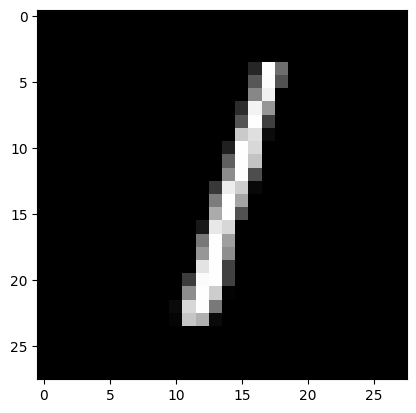

In [78]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[2]
data= data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')

image= data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()